In [19]:
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import io
import os
import sys
import json
import urllib3
import multiprocessing

from PIL import Image
from tqdm import tqdm
from urllib3.util import Retry

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [39]:
def download_image(fnames_and_urls):
    """
    download image and save its with 90% quality as JPG format
    skip image downloading if image already exists at given path
    :param fnames_and_urls: tuple containing absolute path and url of image
    """
    fname, url = fnames_and_urls
    if not os.path.exists(fname):
        http = urllib3.PoolManager(retries=Retry(connect=3, read=2, redirect=3))
        response = http.request("GET", url)
        image = Image.open(io.BytesIO(response.data))
        image_rgb = image.convert("RGB")
        image_rgb.save(fname, format='JPEG', quality=90)


def parse_dataset(_dataset, _outdir, _max=10000):
    """
    parse the dataset to create a list of tuple containing absolute path and url of image
    :param _dataset: dataset to parse
    :param _outdir: output directory where data will be saved
    :param _max: maximum images to download (change to download all dataset)
    :return: list of tuple containing absolute path and url of image
    """
    _fnames_urls = []
    with open(_dataset, 'r') as f:
        data = json.load(f)
        for image in data["images"]:
            url = image["url"]
            fname = os.path.join(_outdir, "{}.jpg".format(image["imageId"]))
            #fname = os.path.join(_outdir, "{}.jpg".format(image["imageId"]))
            _fnames_urls.append((fname, url))
    return _fnames_urls[:_max]


In [40]:
if __name__ == '__main__':
    if len(sys.argv) != 3:
        print("error: not enough arguments")
        sys.exit(0)

    # get args and create output directory
    dataset, outdir = sys.argv[1:]
    if not os.path.exists(outdir):
        os.makedirs(outdir)

    # parse json dataset file
    fnames_urls = parse_dataset(f'train.json', 'data/train')

    # download data
    pool = multiprocessing.Pool(processes=12)
    with tqdm(total=len(fnames_urls)) as progress_bar:
        for _ in pool.imap_unordered(download_image, fnames_urls):
            progress_bar.update(1)

    sys.exit(1)

100%|██████████| 10000/10000 [01:22<00:00, 120.84it/s]


SystemExit: 1

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [14]:
len(list(open(f'train.json')))

15052768

In [15]:
dataset

'-f'

In [60]:
img = Image.open(f'data/train/4002.jpg')

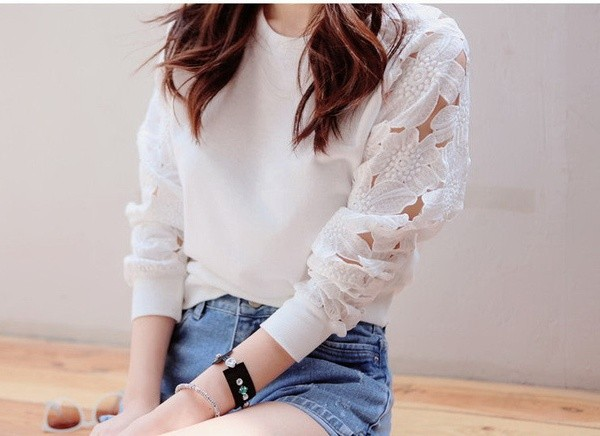

In [61]:
img

JSON to MultiLabel
https://www.kaggle.com/anqitu/for-starter-json-to-multilabel-in-24-seconds

In [8]:
import time
script_start_time = time.time()

import pandas as pd
import numpy as np
import json

pd.set_option('display.max_rows', 600)
pd.set_option('display.max_rows', 50)
import warnings
warnings.filterwarnings('ignore')

data_path = '' #location where train.json, test.json, and validation.json are

1. Load data from json

In [63]:
# Load data
print('%0.2f min: Start loading data'%((time.time() - script_start_time)/60))

train = {}
test = {}
validation = {}
with open('%strain.json'%(data_path)) as json_data:
    train = json.load(json_data)
with open('%stest.json'%(data_path)) as json_data:
    test = json.load(json_data)
with open('%svalidation.json'%(data_path)) as json_data:
    validation = json.load(json_data)
    
print('Train No. of images: %d'%(len(train['images'])))
print('Test No. of images: %d'%(len(test['images'])))
print('Validation No. of images: %d'%(len(validation['images'])))

72.27 min: Start loading data
Train No. of images: 1014544
Test No. of images: 39706
Validation No. of images: 9897


In [64]:
#JSON to Pandas dataframe

#train data
train_img_url = train['images']
train_img_url = pd.DataFrame(train_img_url)
train_ann = train['annotations']
train_ann = pd.DataFrame(train_ann)
train = pd.merge(train_img_url, train_ann, on='imageId', how='inner')

In [65]:
train_limited = train[:10000]
train_limited.shape

(10000, 3)

In [66]:
train['url'][4001]

'https://contestimg.wish.com/api/webimage/53c62899d911393ce9e76c26-large'

In [71]:
#test data
test=pd.DataFrame(test['images'])

In [72]:
#validation data
val_img_url = validation['images']
val_img_url = pd.DataFrame(val_img_url)
val_ann = validation['annotations']
val_ann = pd.DataFrame(val_ann)
validation = pd.merge(val_img_url, val_ann, on='imageId', how='inner' )

In [77]:
train.head()

,imageId,url,labelId
0,1,https://contestimg.wish.com/api/webimage/570f3...,"[95, 66, 137, 70, 20]"
1,2,https://contestimg.wish.com/api/webimage/5468f...,"[36, 66, 44, 214, 105, 133]"
2,3,https://contestimg.wish.com/api/webimage/54641...,"[170, 66, 97, 153, 105, 138]"
3,4,https://contestimg.wish.com/api/webimage/550b9...,"[18, 66, 44, 153, 164]"
4,5,https://contestimg.wish.com/api/webimage/54451...,"[189, 66, 176, 137, 153, 74, 181, 171, 138]"


In [78]:
test.head()

,imageId,url
0,1,https://contestimg.wish.com/api/webimage/568e1...
1,2,https://contestimg.wish.com/api/webimage/5452f...
2,3,https://contestimg.wish.com/api/webimage/54058...
3,4,https://contestimg.wish.com/api/webimage/540c6...
4,5,https://contestimg.wish.com/api/webimage/54477...


In [79]:
validation.head()

,imageId,url,labelId
0,1,https://contestimg.wish.com/api/webimage/568e1...,"[62, 17, 66, 214, 105, 137, 85]"
1,2,https://contestimg.wish.com/api/webimage/5452f...,"[95, 17, 66, 214, 164, 137, 20, 204, 184]"
2,3,https://contestimg.wish.com/api/webimage/54058...,"[122, 19, 66, 186, 180, 44, 154, 20]"
3,4,https://contestimg.wish.com/api/webimage/540c6...,"[190, 222, 66, 153, 164, 226, 53, 184]"
4,5,https://contestimg.wish.com/api/webimage/54477...,"[62, 66, 153, 171, 111, 137, 70, 204, 184]"


# Apply Fast.ai multi-label classification

In [80]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../../../fastai/")
sys.path.append("../../../fastai/courses/dl1")

from fastai.imports import *
from fastai.transforms  import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [81]:
def f1(preds,targs):
   return max([fbeta_score(targs,preds,beta=1,average='samples')]) #check

In [89]:
PATH = 'data'
sz = 224
f_model = resnet34
bs = 128
metrics = [f1]

In [90]:
ls {PATH}

test/  train/


In [94]:
train_limited.drop(columns=['url'],inplace=True)

In [95]:
train_limited.to_csv('train_limited.csv',index=False)
FileLink('train_limited.csv')

/home/paperspace/kaggle/competitions/imaterialist-challenge-fashion-2018/train_limited.csv

In [ ]:
#Need to download validation set
def get_data(sz):
    tfms = tfms_from_model(f_model,sz,aug_tfms=transforms_side_on, max_zoom=1.5)
    return ImageClassifierData.from_csv(PATH,'train',train_limited,tfms=tfms,
                        suffix='jpg',val_idxs=)